Demand by precipitation, temperature, weekday, and hour.

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from utils import geoutils
from utils import datautils

pd.options.mode.chained_assignment = None

/home/atkm/code/taxi-demand-prediction/venv/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
rides = datautils.read_rides(datautils.get_rides_data(2014, 1, 'small'))
metar = datautils.read_metar(datautils.get_metar_data(2014,1))
df = datautils.join_rides_metar(rides, metar)

In [3]:
df.head()

,grid_x,grid_y,count,precip_in,fahrenheit,weekday,hour
0,17,55,1,0.0,26.06,2,0
1,19,53,1,0.0,26.06,2,0
2,20,53,2,0.0,26.06,2,0
3,21,53,1,0.0,26.06,2,0
4,22,56,1,0.0,26.06,2,0


## Rank Grid Cells
- The most popular cells (1%) are x=(23,35), y=(45, 53)
- 5%: x=(17, 76), y=(42, 57)

In [23]:
counts = datautils.counts_by_grid_cell(rides).reset_index(name='count')

In [24]:
counts['count'].describe(percentiles=[0.99, 0.95, 0.90, 0.75])

count    2143.000000
mean      230.117126
std       654.547953
min         1.000000
50%         4.000000
75%        34.000000
90%       756.000000
95%      1752.600000
99%      3352.440000
max      4799.000000
Name: count, dtype: float64

### 99th quantile

In [26]:
top_1_percent = counts['count'] >= counts['count'].quantile(0.99)
high_demand = counts[top_1_percent].sort_values(by='count', ascending=False)

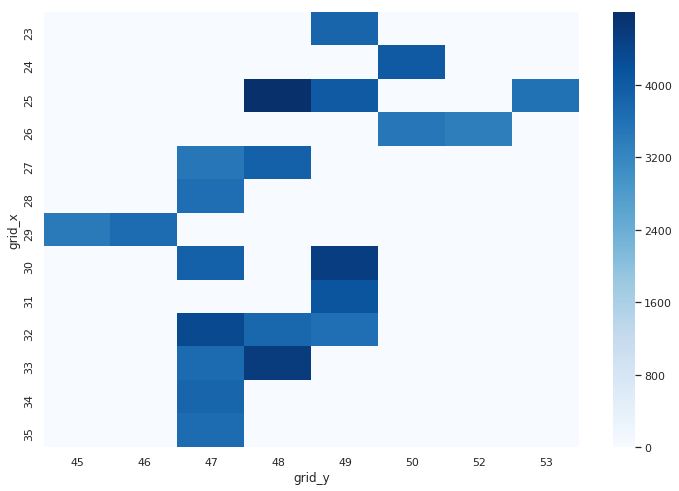

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(high_demand.pivot('grid_x', 'grid_y', 'count').\
           fillna(0), cmap='Blues')

### 95th quantile

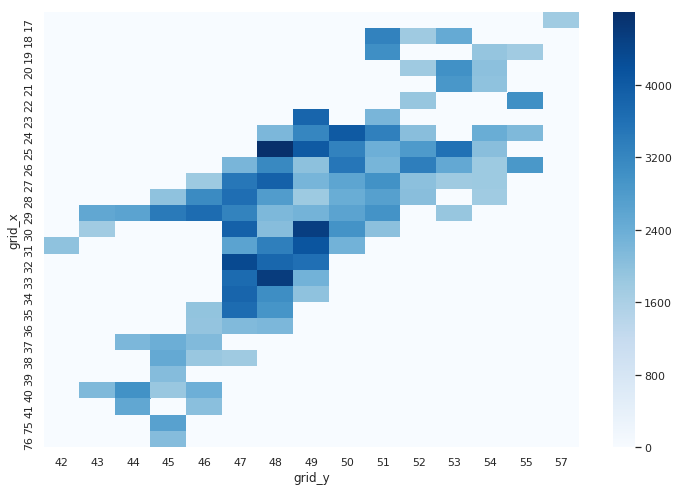

In [30]:
# TODO: consolidate this code with the cell above.
top_1_percent = counts['count'] >= counts['count'].quantile(0.95)
high_demand = counts[top_1_percent].sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(high_demand.pivot('grid_x', 'grid_y', 'count').\
           fillna(0), cmap='Blues')

## Demand by feature

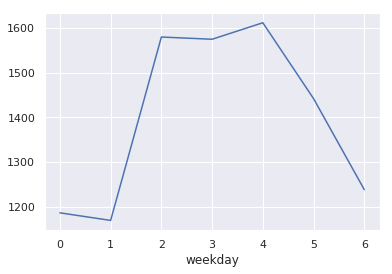

In [5]:
# 0 = Monday, 6 = Sunday
df.groupby('weekday')['count'].sum().plot()

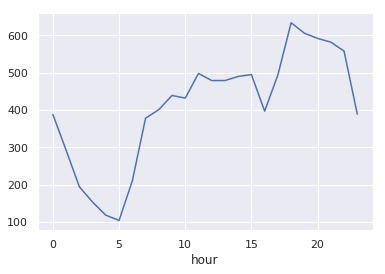

In [5]:
df.groupby('hour')['count'].sum().plot()

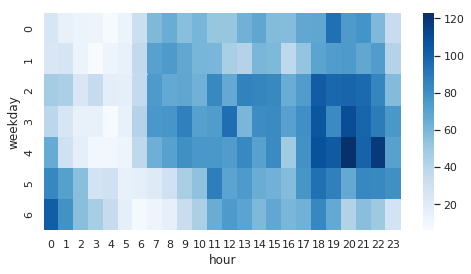

In [6]:
by_weekday_hour = df.groupby(['weekday','hour'])['count'].sum()
plt.figure(figsize=(8,4))
sns.heatmap(by_weekday_hour.reset_index().pivot(index='weekday', columns='hour', values='count'), cmap='Blues')

IntervalIndex([(3.869, 16.7], (16.7, 29.48], (29.48, 42.26], (42.26, 55.04]]
              closed='right',
              dtype='interval[float64]')


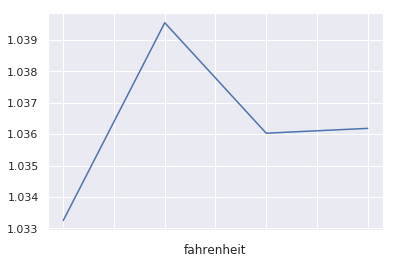

In [13]:
fahrenheit_binned = pd.cut(df.fahrenheit, bins=4)
print(fahrenheit_binned.cat.categories)
fahrenheit_binned = pd.DataFrame({'fahrenheit': fahrenheit_binned, 'count': df['count']})
fahrenheit_binned.groupby('fahrenheit')['count'].mean().plot()

IntervalIndex([(-0.00012, 0.04], (0.04, 0.08], (0.08, 0.12]]
              closed='right',
              dtype='interval[float64]')


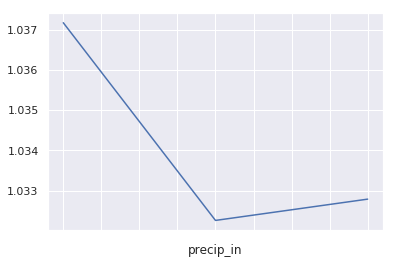

In [12]:
# this needs to be normalized by the hour.
#Without normalization, it basically shows the number of hours for each precipitation level.
precip_binned = pd.cut(df.precip_in, bins=3)
print(precip_binned.cat.categories)
precip_binned = pd.DataFrame({'precip_in': precip_binned, 'count': df['count']})
precip_binned.groupby('precip_in')['count'].mean().plot()